# Importing all desired libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# Reading the dataset

In [2]:
data=pd.read_csv(r'C:\DAm project\Data-and-Ml-basic\Project\winequalitytest.csv')
data.head()

,type,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,chlorides,FreeSulfurDioxide,TotalSulfurDioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Finding categorical data from dataset

In [3]:
#To findout categorical data only from the dataset
catdata=data.select_dtypes(include=['object']).copy()
catdata.head()

,type
0,white
1,white
2,white
3,white
4,white


 Categorical variable---type which is(red and white wine) .
Quantitative Variables ---FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,chlorides,FreeSulfurDioxide,TotalSulfurDioxide,density,pH,sulphates,alcohol,quality

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                  6497 non-null object
FixedAcidity          6487 non-null float64
VolatileAcidity       6489 non-null float64
CitricAcid            6494 non-null float64
ResidualSugar         6495 non-null float64
chlorides             6495 non-null float64
FreeSulfurDioxide     6497 non-null float64
TotalSulfurDioxide    6497 non-null float64
density               6497 non-null float64
pH                    6488 non-null float64
sulphates             6493 non-null float64
alcohol               6497 non-null float64
quality               6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


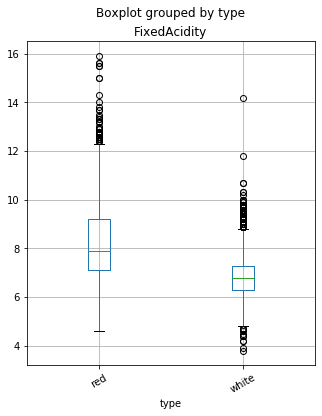

In [5]:
#Plotting a box plox for categorical variable
data.boxplot('FixedAcidity','type',rot = 30,figsize=(5,6))

In [6]:
#Checking for null values
print(catdata.isnull().values.sum())

0


There is no null value in dataset

In [7]:
#Grouping by according to type 
data.groupby('type').first()
data.head()

,type,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,chlorides,FreeSulfurDioxide,TotalSulfurDioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
#Calculating the count of categorical variable in the dataset
print(catdata['type'].value_counts())
#It tells the total categories type data  is divided into
print("It is divided into",catdata['type'].value_counts().count(),"Categories")

white    4898
red      1599
Name: type, dtype: int64
It is divided into 2 Categories


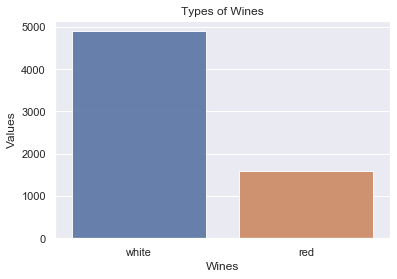

In [9]:
#Plotting a barplot for the categorical data
typecount = catdata['type'].value_counts()
sns.set(style="darkgrid")
sns.barplot(typecount.index, typecount.values, alpha=0.9)
plt.title('Types of Wines')
plt.ylabel('Values', fontsize=12)
plt.xlabel('Wines', fontsize=12)
plt.show()

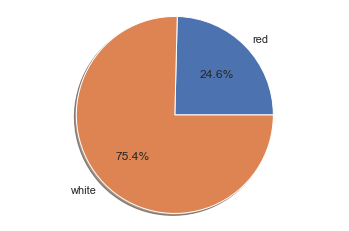

In [10]:
#Plotting a pie chart for the categorical data
labels = catdata['type'].astype('category').cat.categories.tolist()
counts = catdata['type'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [11]:
data.fillna(0,inplace=True)

# Univariate and Bivariate analysis

## Univariate distribution

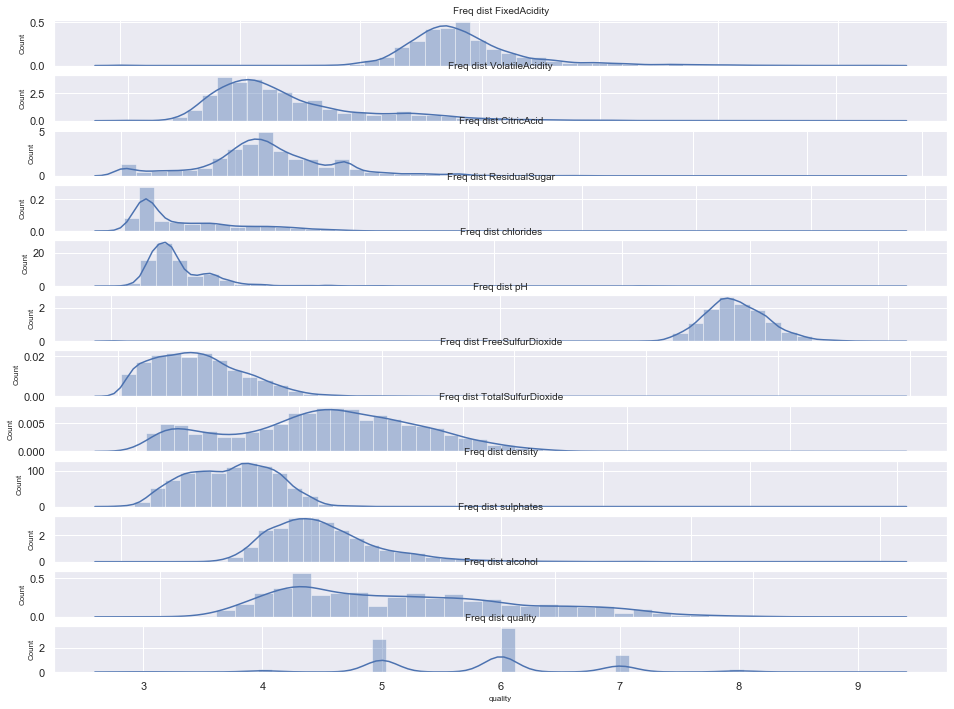

In [12]:
#Univariate distribution
col_names= ['FixedAcidity','VolatileAcidity','CitricAcid','ResidualSugar','chlorides','pH','FreeSulfurDioxide','TotalSulfurDioxide','density','sulphates','alcohol','quality']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(data[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
plt.show()

NormallySkewed- FixedAcidity,VolatileAcidity,CitricAcid,sulphates.........PositivelySkewed---chlorides,pH.......  NegativelySkewed----ResidualSugar,SulfurDioxide,TotalSulfurDioxide,density,alcohal

## Bivariate distribution

<Figure size 1008x1008 with 0 Axes>

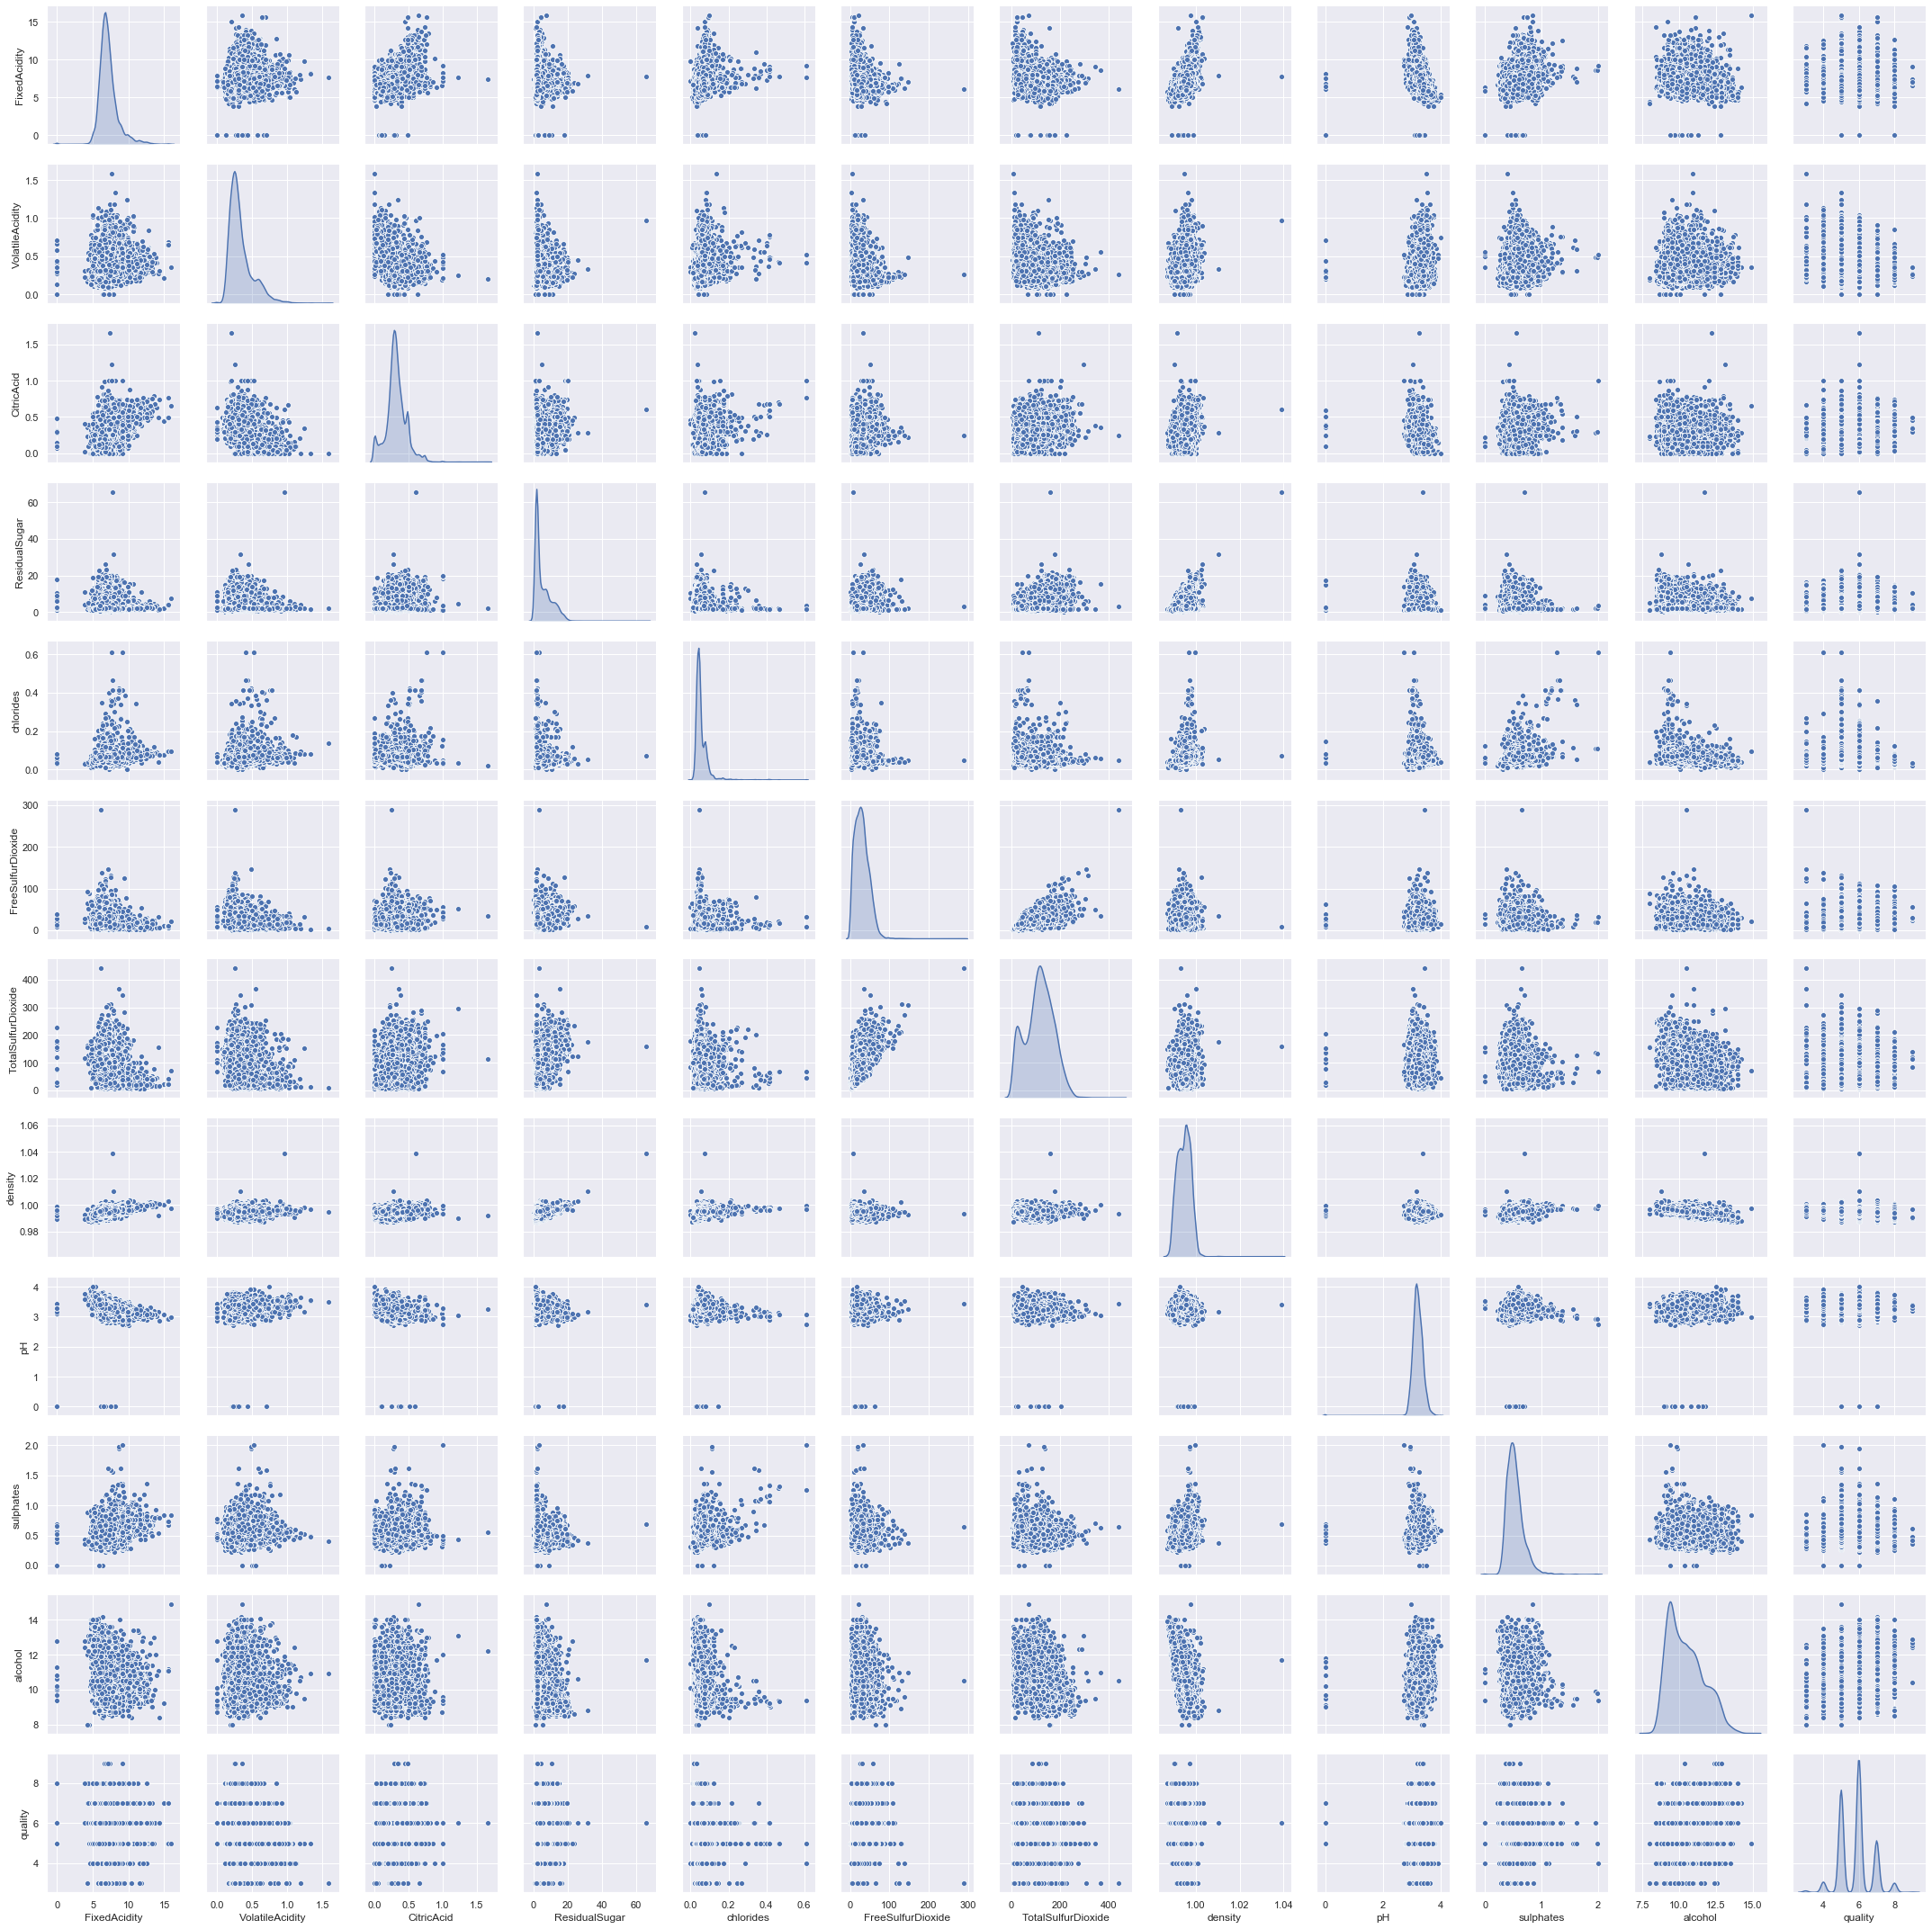

In [13]:
#Bivariate distribution
plt.figure(figsize=(14, 14))
sns.pairplot(data, diag_kind='kde');

# Identifying and treating missing values

In [14]:
data.isnull().values.any()

False

In [15]:
data.isnull().sum()

type                  0
FixedAcidity          0
VolatileAcidity       0
CitricAcid            0
ResidualSugar         0
chlorides             0
FreeSulfurDioxide     0
TotalSulfurDioxide    0
density               0
pH                    0
sulphates             0
alcohol               0
quality               0
dtype: int64

There areno missing values in dataset

# CorrelationMatrix

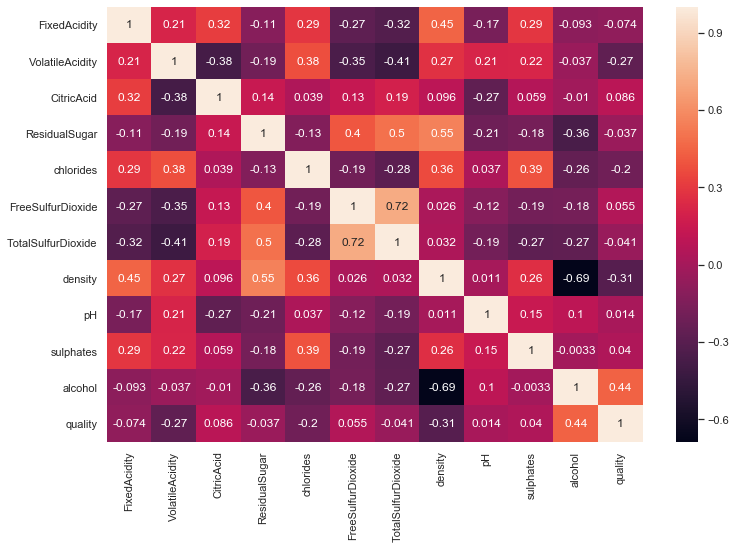

In [16]:
#CorelationMatrix
plt.figure(figsize=(12, 8))
datacorr = data.corr()
sns.heatmap(datacorr, xticklabels = datacorr.columns.values,yticklabels = datacorr.columns.values,annot = True)